In [28]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
from experiment import *
import logging
import pandas
from pandas import DataFrame as df
from scipy.interpolate import make_interp_spline, BSpline
from scipy.ndimage import uniform_filter1d

In [29]:
!pwd

/home/156/jm0124/kae-cyclones/src


In [52]:
def smooth(x,y, N=5):
    return x, uniform_filter1d(y, size=N) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

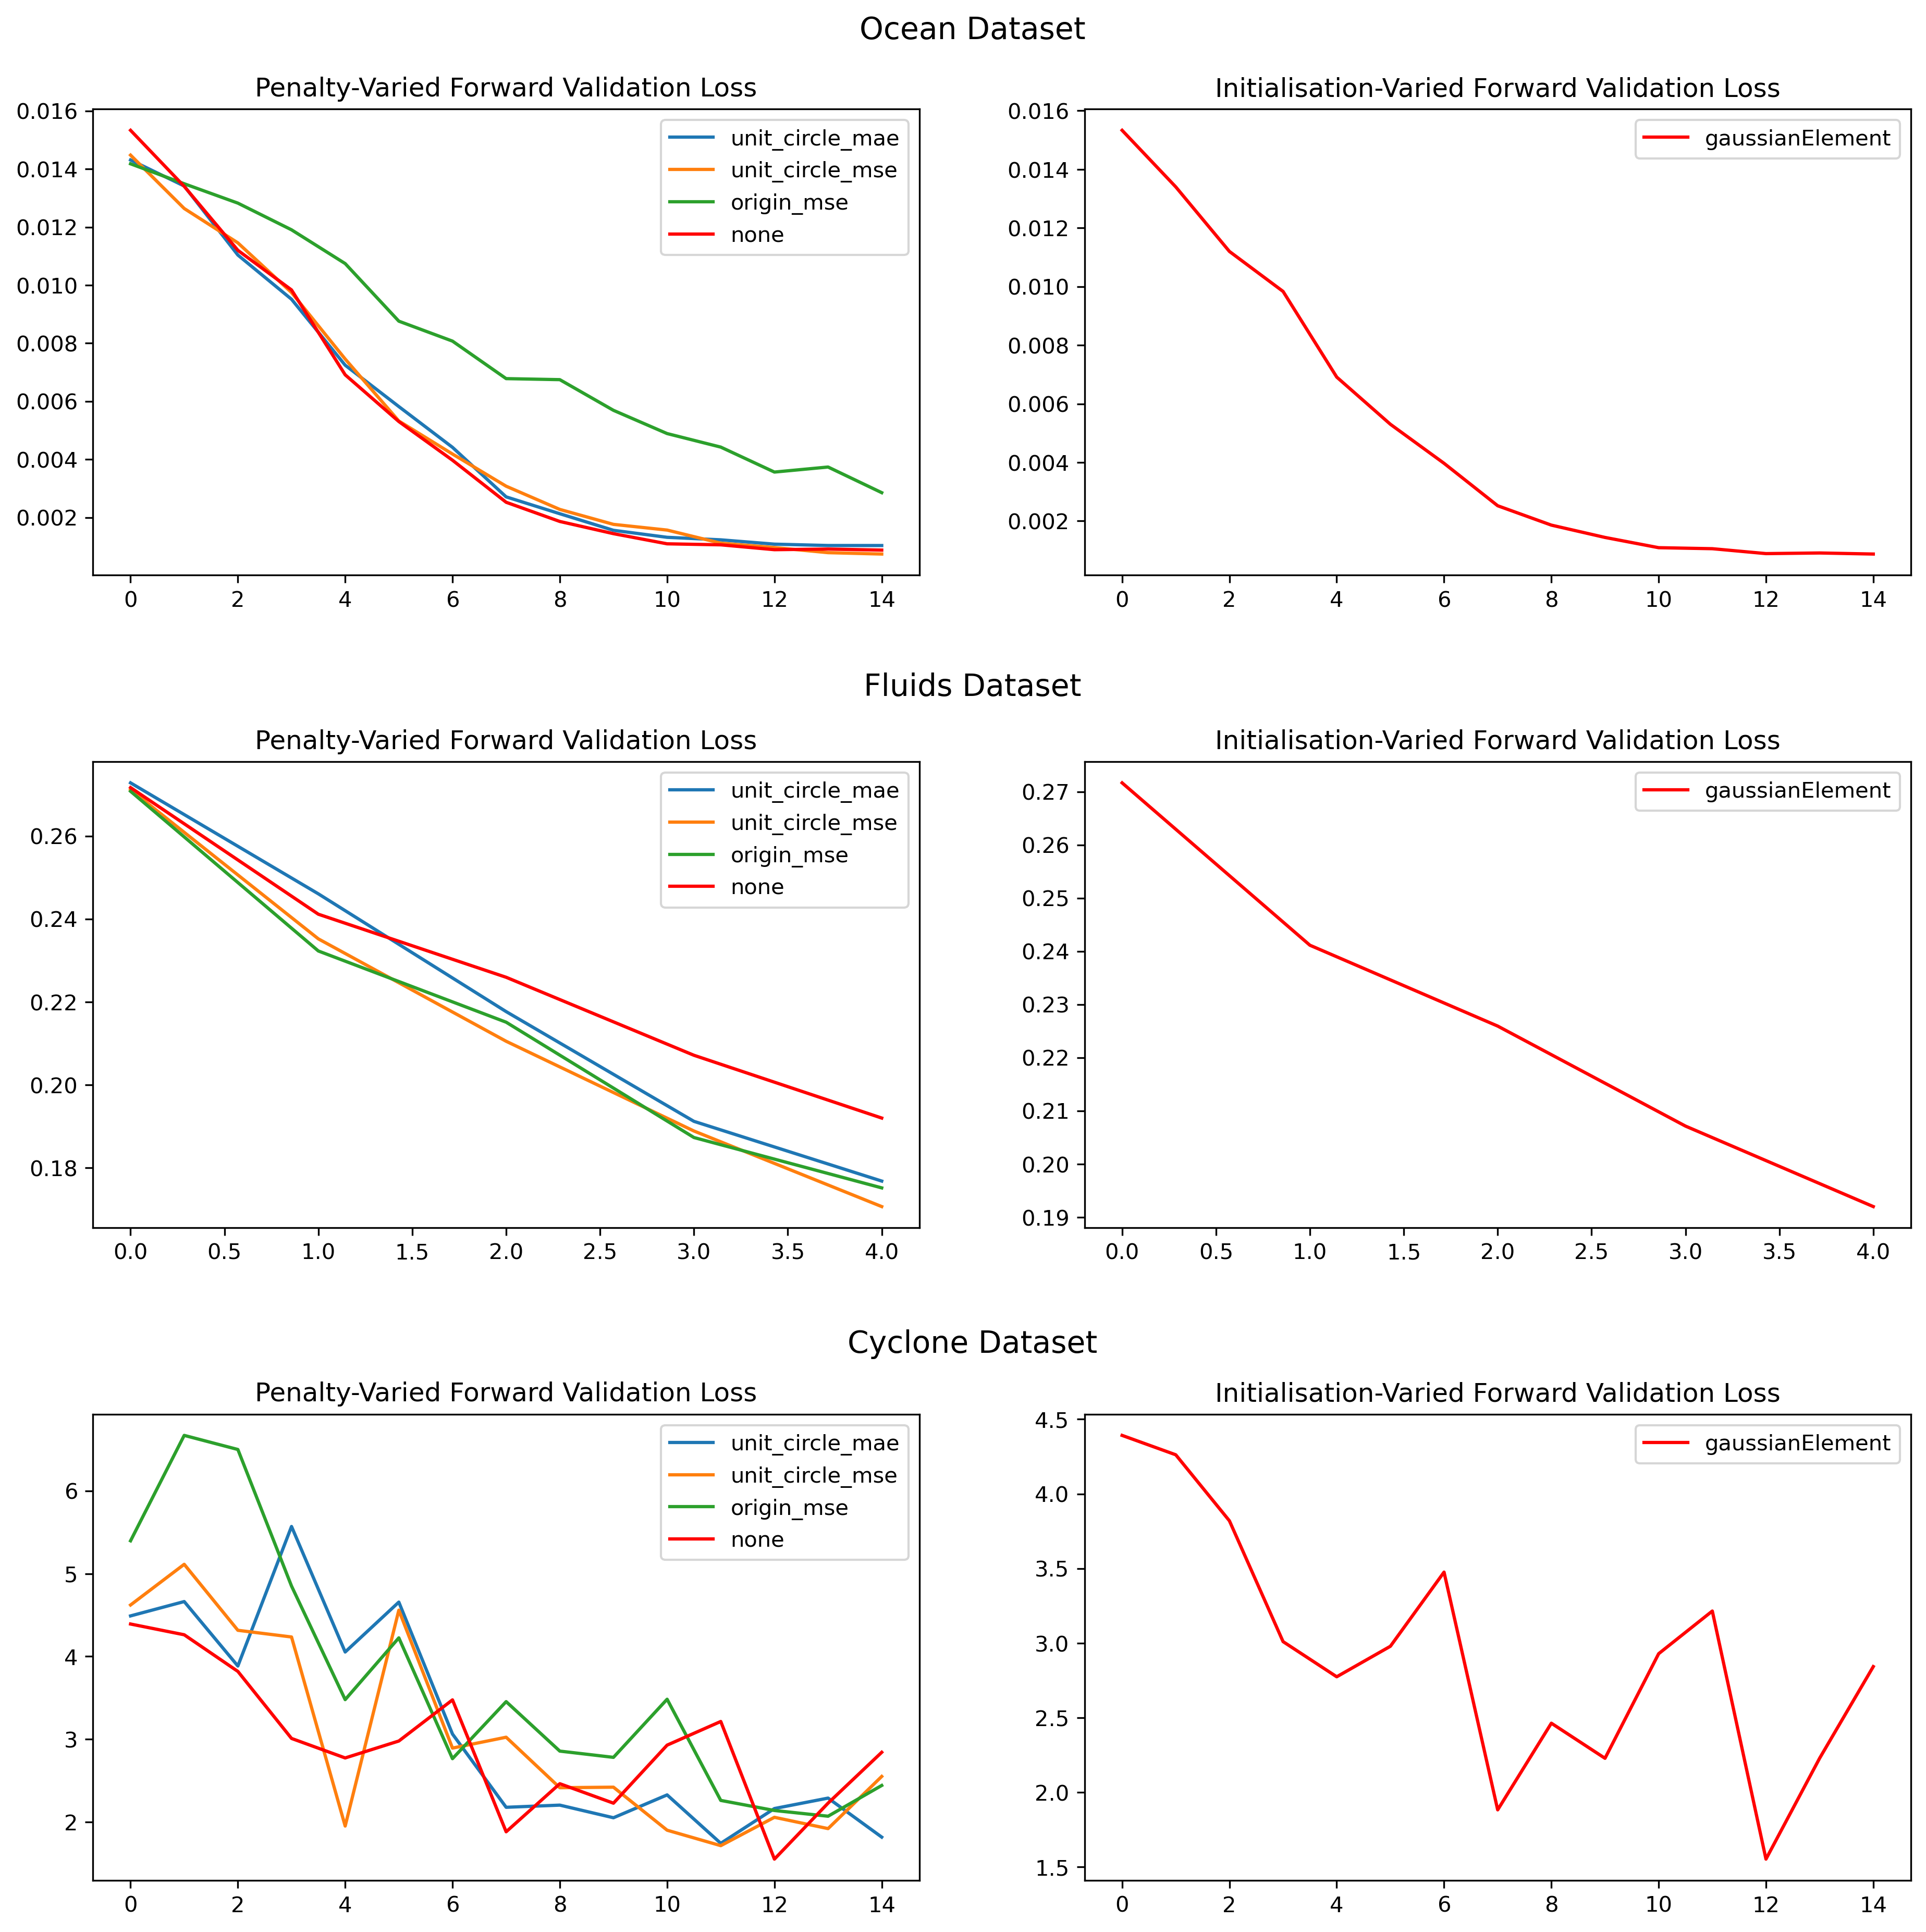

In [82]:
logger = logging.getLogger('my_module_name')
otherResults = []

with open("/home/156/jm0124/kae-cyclones/results/run_data/ocean_overnight_testing.json", 'r') as f:
     otherResults.append(('Fluid',json.load(f)))
        
with open("/home/156/jm0124/kae-cyclones/results/run_data/fluid_overnight_testing.json", 'r') as f:
    otherResults.append(('Fluids', json.load(f)))
    
with open("/home/156/jm0124/kae-cyclones/results/run_data/cyclone_overnight_testing.json", 'r') as f:
    otherResults.append(('Cyclone', json.load(f)))
    
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=300)

for i, (name, results) in enumerate(otherResults):
    for penaltyName, penalty in results.items():
        epochs = [x for x in range(len(penalty["gaussianElement"]["1e0"]["loss"]))]
        if penaltyName == 'none':
            X_, Y_ = smooth(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"])
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}", color='r')
        else:
            X_, Y_ = smooth(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"])
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}")

        if penaltyName == 'none':
            for init_name, init in penalty.items():
                if (init_name == 'doubleGaussianEigen' or init_name == 'svdElement'):
                    continue
                elif init_name == 'gaussianElement':
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}", color='r')
                else:
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}")

        axs[i][0].legend()
        axs[i][1].legend()
        axs[i][0].set_title('Penalty-Varied Forward Validation Loss')
        axs[i][1].set_title('Initialisation-Varied Forward Validation Loss')

# for row in axs:
#     for ax in row:
#         ax.set_yscale('log')
#         ax.set_xscale('log')

plt.figtext(0.5,0.92, "Ocean Dataset", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.64, "Fluids Dataset", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.36, "Cyclone Dataset", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )
plt.savefig('final_otherds.png')
plt.show()

dict_keys(['unit_circle_mae', 'unit_circle_mse', 'none'])
dict_keys(['unit_circle_mae', 'unit_circle_mse', 'none'])
dict_keys(['unit_circle_mae', 'unit_circle_mse', 'none'])
Diss0
Diss0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Diss0
Diss0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Diss0
Diss0 [0, 1, 2

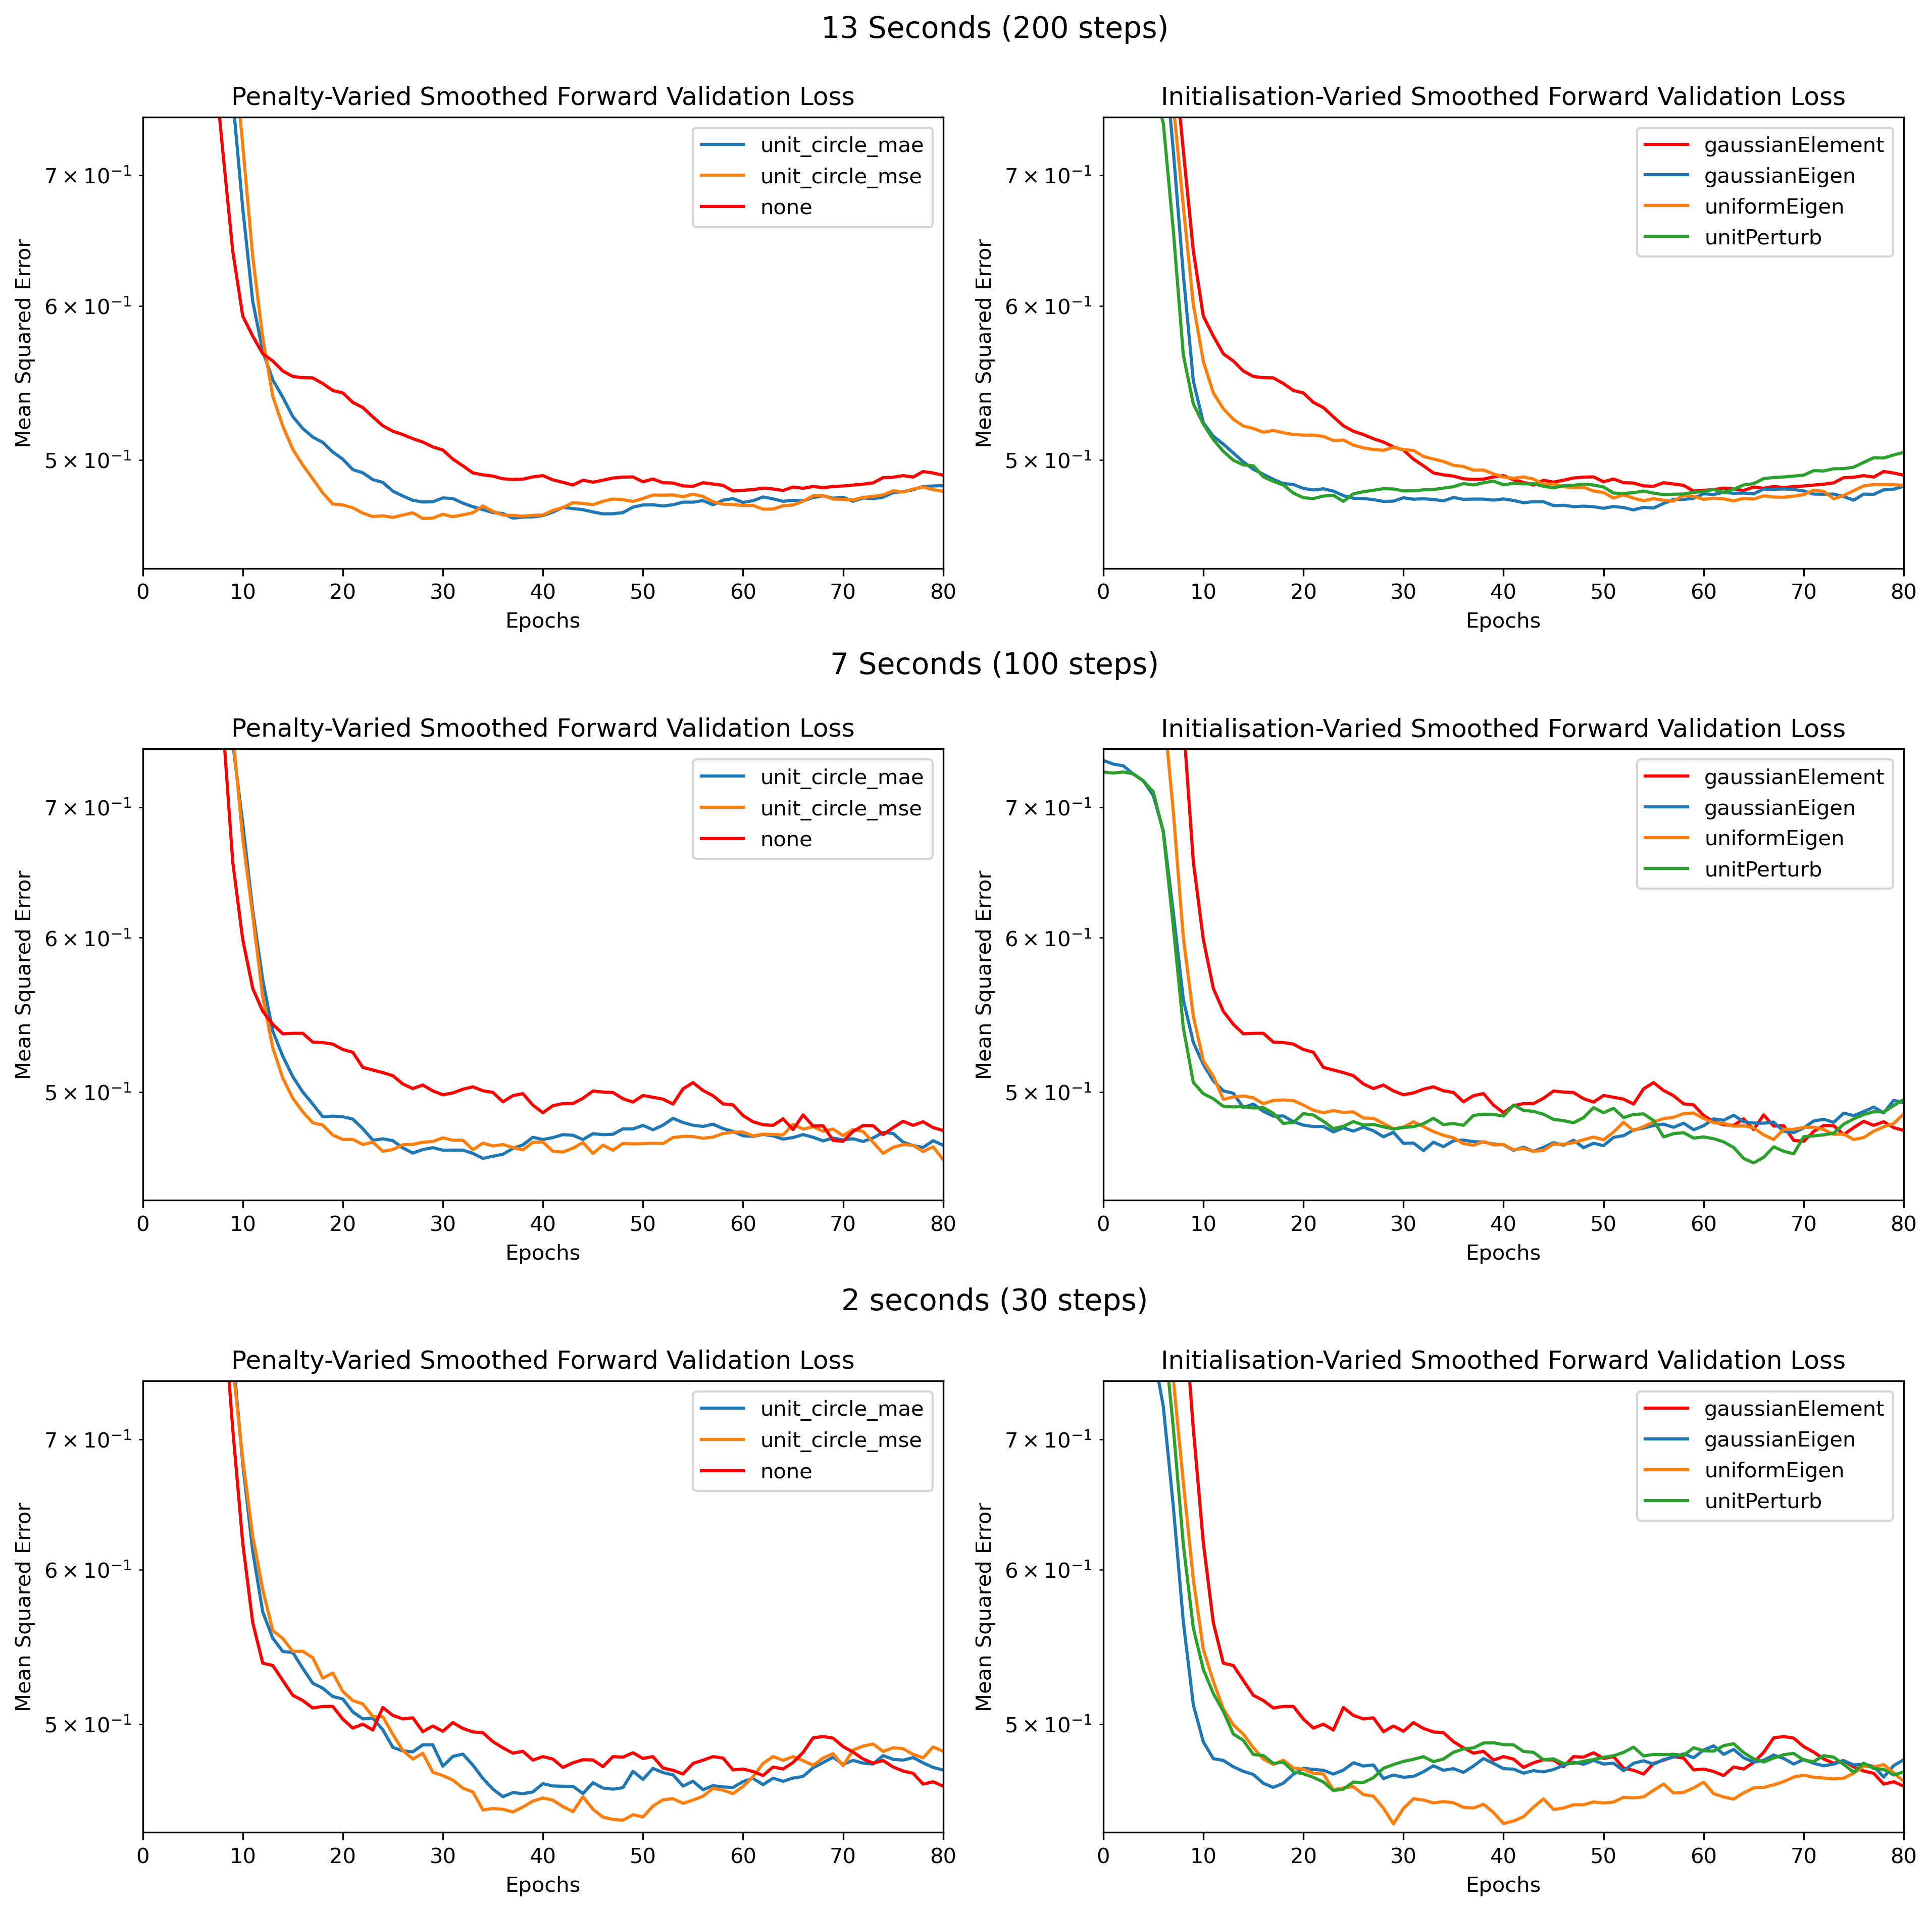

In [38]:
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=300)
otherResults = []

with open("/home/156/jm0124/kae-cyclones/results/run_data/pendulum0_overnight_penal_noise_run_200_a.json", 'r') as f:
     otherResults.append(('Diss0', json.load(f)))
        
with open("/home/156/jm0124/kae-cyclones/results/run_data/pendulum0_overnight_penal_noise_run_200.json", 'r') as f:
    otherResults[0][1]["none"].update(json.load(f)["none"])
    print(otherResults[0][1].keys())

with open("/home/156/jm0124/kae-cyclones/results/run_data/pendulum0_overnight_penal_noise_run_100_a.json", 'r') as f:
    otherResults.append(('Diss5', json.load(f)))

with open("/home/156/jm0124/kae-cyclones/results/run_data/pendulum0_overnight_penal_noise_run_100.json", 'r') as f:
    otherResults[1][1]["none"].update(json.load(f)["none"])
    print(otherResults[1][1].keys())
    
with open("/home/156/jm0124/kae-cyclones/results/run_data/pendulum0_overnight_penal_noise_run_30_a.json", 'r') as f:
    otherResults.append(('Diss9', json.load(f)))

with open("/home/156/jm0124/kae-cyclones/results/run_data/pendulum0_overnight_penal_noise_run_30.json", 'r') as f:
    otherResults[2][1]["none"].update(json.load(f)["none"])
    print(otherResults[2][1].keys())

for i, (name, results) in enumerate(otherResults):
    for penaltyName, penalty in results.items():
        print(name)
        epochs = [x for x in range(len(penalty["gaussianElement"]["1e0"]["loss"]))]
        print(name, epochs)
        if penaltyName == 'none':
            X_, Y_ = smooth(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"])
            print(X_)
            print(Y_)
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}", color='r')
        elif penaltyName == 'origin_mse':
            continue
        else:
            X_, Y_ = smooth(epochs, penalty["gaussianElement"]["1e0"]["fwd_val"])
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}")
        
        if penaltyName == 'none':
            for init_name, init in penalty.items():
                epochs = [x for x in range(len(penalty["gaussianEigen"]["1e0"]["loss"]))]
                if (init_name == 'doubleGaussianEigen' or init_name == 'svdElement'):
                    continue
                elif init_name == 'gaussianElement':
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"][:len(epochs)])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}", color='r')
                    continue
                else:
                    X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
                    axs[i][1].plot(X_, Y_, label=f"{init_name}")

for l in axs:
    for ax in l:
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Mean Squared Error')
        ax.set_yscale('log')
        # ax.set_xscale('log')
        # ax.set_xlim(0,100)
        ax.set_ylim(0.44,0.75)
        ax.set_xlim(0,80)
        ax.legend(loc=1)

    l[0].set_title('Penalty-Varied Smoothed Forward Validation Loss')
    l[1].set_title('Initialisation-Varied Smoothed Forward Validation Loss')
    
plt.figtext(0.5,0.925, "13 Seconds (200 steps)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.645, "7 Seconds (100 steps)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.365, "2 seconds (30 steps)", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )
plt.savefig('final_pend.png')

/jobfs/57819930.gadi-pbs/ipykernel_2638651/270492498.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,1e-3)


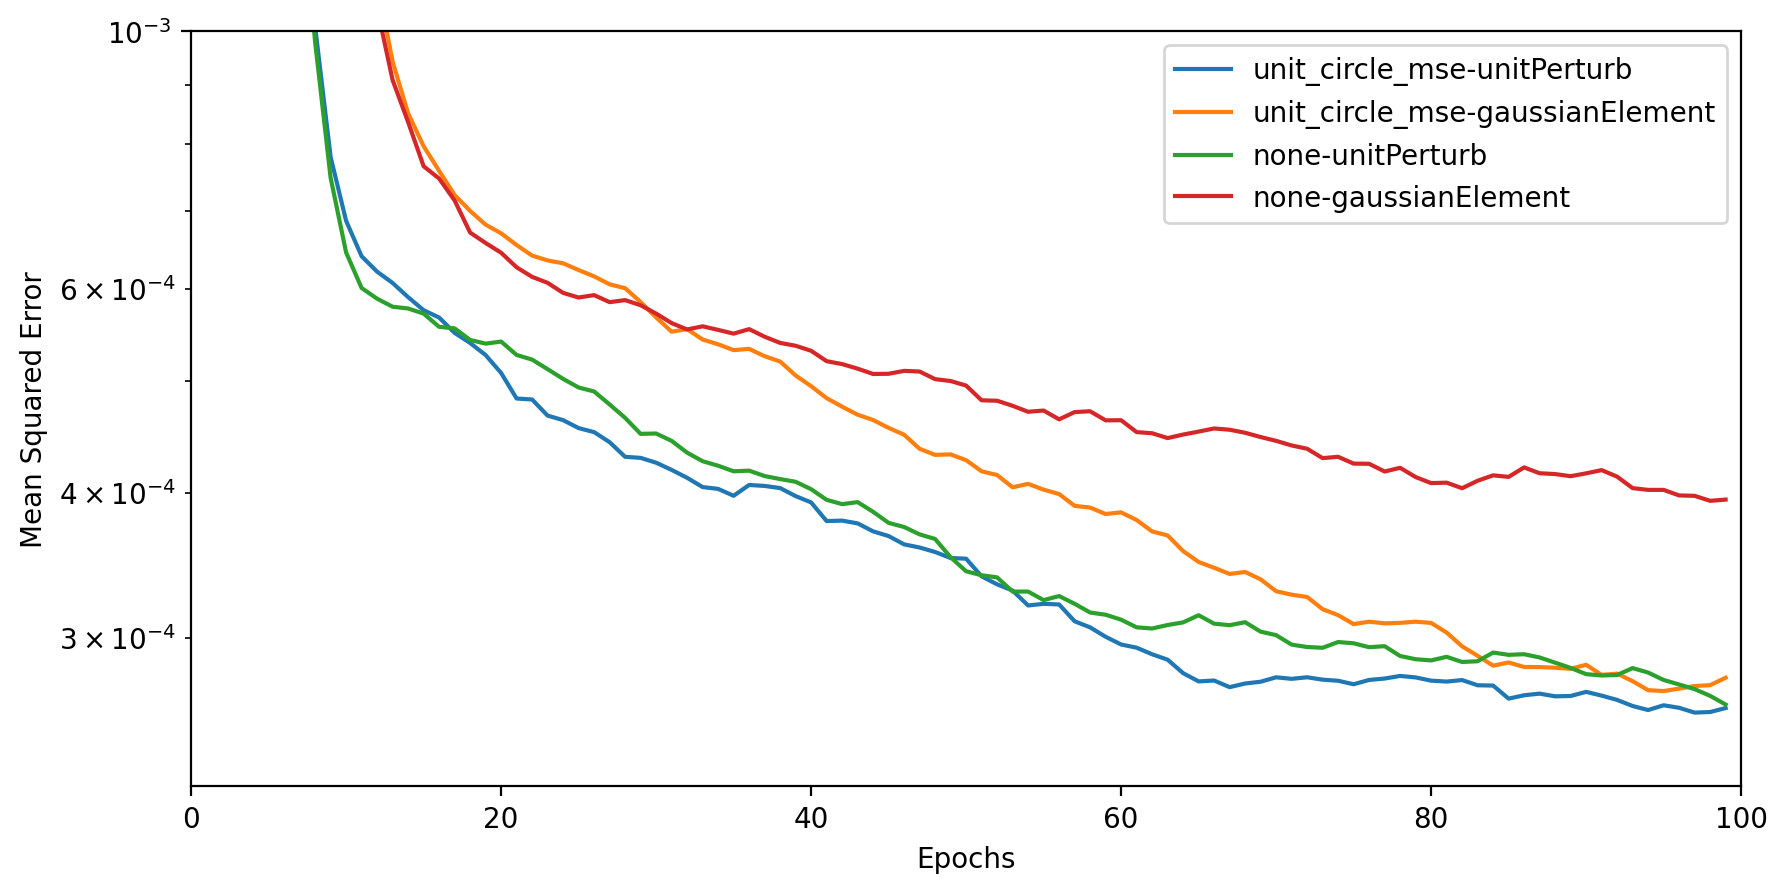

In [ ]:
fig = plt.figure(1,figsize=(10,5), dpi=200)

with open("/home/156/jm0124/kae-cyclones/results/run_data/ocean_both.json", 'r') as f:
     results = json.load(f)

mins = {}        

for penaltyName, penalty in results.items():
    epochs = [x for x in range(len(penalty["gaussianElement"]["1e0"]["loss"]))]
    for init_name, init in penalty.items():
        X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"][:len(epochs)])
        plt.plot(X_, Y_, label=f"{penaltyName}-{init_name}")
        mins[penaltyName][init_name] = np.array(
        #     continue
        # else:
        #     X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"])
        #     plt.plot(X_, Y_, label=f"{init_name}")

plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.yscale('log')
# plt.xscale('log')
# ax.set_xlim(0,100)
plt.ylim(0,1e-3)
plt.xlim(0,100)
plt.legend(loc=1)
    
# plt.figtext(0.5,0.925, "13 Seconds (200 steps)", ha="center", va="top", fontsize=14)
# plt.figtext(0.5,0.645, "7 Seconds (100 steps)", ha="center", va="top", fontsize=14)
# plt.figtext(0.5,0.365, "2 seconds (30 steps)", ha="center", va="top", fontsize=14)
# plt.subplots_adjust(hspace = 0.4 )
plt.savefig('four_comparison.png')
plt.show()

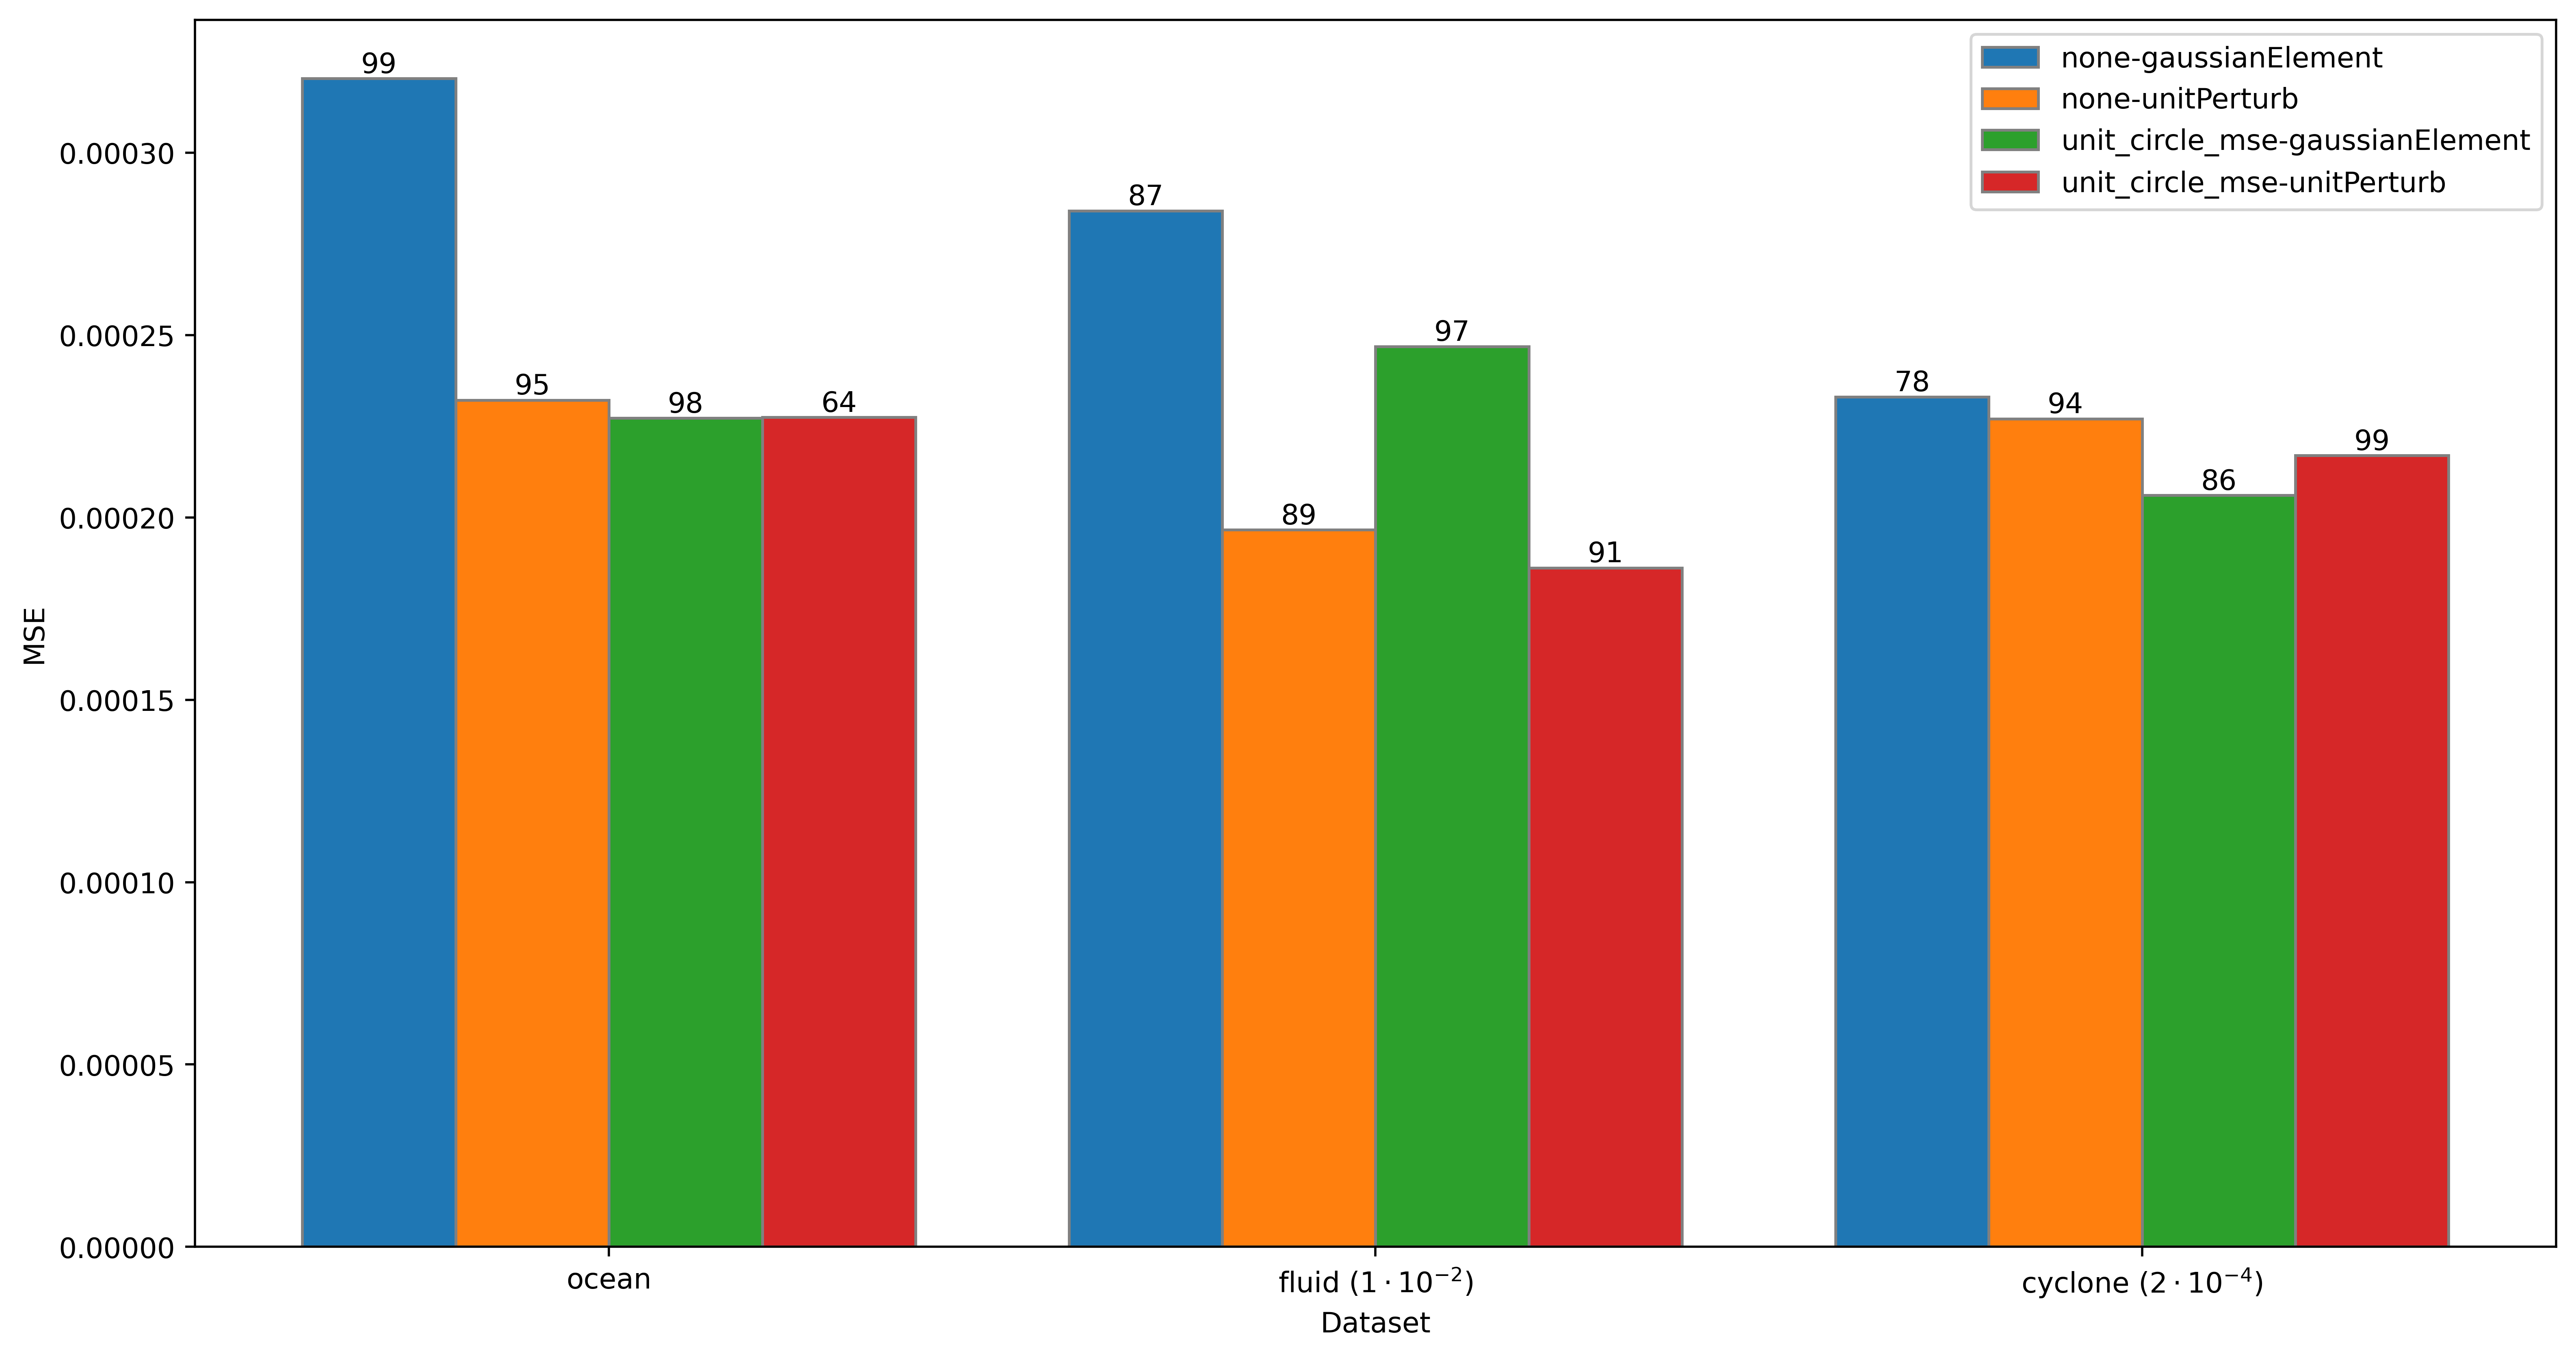

In [118]:
allResults = []

with open("/home/156/jm0124/kae-cyclones/results/run_data/ocean_both.json", 'r') as f:
     allResults.append(('ocean',json.load(f)))

with open("/home/156/jm0124/kae-cyclones/results/run_data/fluid_both_updated.json", 'r') as f:
     allResults.append(('fluid',json.load(f)))
        
with open("/home/156/jm0124/kae-cyclones/results/run_data/cyclone_both_updated.json", 'r') as f:
     allResults.append(('cyclone',json.load(f)))

mins = {}    
noneNone = []
noneUnit = []
mseNone = []
mseUnit = []

for (name, ds) in allResults:
    noneNone.append(np.array([np.argmin(ds['none']['gaussianElement']['1e0']['fwd_val']), np.min(ds['none']['gaussianElement']['1e0']['fwd_val'])]))
    noneUnit.append(np.array([np.argmin(ds['none']['unitPerturb']['1e0']['fwd_val']), np.min(ds['none']['unitPerturb']['1e0']['fwd_val'])]))
    mseNone.append(np.array([np.argmin(ds['unit_circle_mse']['gaussianElement']['1e0']['fwd_val']), np.min(ds['unit_circle_mse']['gaussianElement']['1e0']['fwd_val'])]))
    mseUnit.append(np.array([np.argmin(ds['unit_circle_mse']['unitPerturb']['1e0']['fwd_val']), np.min(ds['unit_circle_mse']['unitPerturb']['1e0']['fwd_val'])]))
#     for penaltyName, penalty in results.items():
        
#         mins[name][penaltyName] = {}
#         epochs = [x for x in range(len(penalty["gaussianElement"]["1e0"]["loss"]))]
#         for initName, init in penalty.items():
#             X_, Y_ = smooth(epochs, init["1e0"]["fwd_val"][:len(epochs)])
#             mins[name][penaltyName][initName] = [np.argmin(init["1e0"]["fwd_val"][:len(epochs)]), np.min(init["1e0"]["fwd_val"][:len(epochs)])]
            

# colors = {
#     'ocean':'royalblue',
#     'fluid':'r',
#     'cyclone':'g'
# }

# ax = fig.add_axes([0,0,1,1])
# X = np.arange(4)

# for i, (dsName, ds) in enumerate(mins.items()):
#     for j, (penaltyName, penalty) in enumerate(ds.items()):
#         for k, (initName, init) in enumerate(penalty.items()):
#             ax.bar(f"{init[0]}", init[1], color=colors[dsName], tick-label='yes')

fig = plt.figure(figsize=(15,8), dpi=500)

noneNone = np.array(noneNone)
noneUnit = np.array(noneUnit)
mseNone = np.array(mseNone)
mseUnit = np.array(mseUnit)

noneNone[2,1] = noneNone[2,1] * 2e-4
noneUnit[2,1] = noneUnit[2,1] * 2e-4
mseNone[2,1] = mseNone[2,1] * 2e-4
mseUnit[2,1] = mseUnit[2,1] * 2e-4

noneNone[1,1] = noneNone[1,1] * 1e-2
noneUnit[1,1] = noneUnit[1,1] * 1e-2
mseNone[1,1] = mseNone[1,1] * 1e-2
mseUnit[1,1] = mseUnit[1,1] * 1e-2

barWidth = 0.2
 
# set height of bar
IT = noneNone[:,0]
ECE = noneUnit[:,0]
CSE = mseNone[:,0]
 
# Set position of bar on X axis
br1 = np.arange(len(noneNone[:,0]))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
p1 = plt.bar(br1, noneNone[:,1], width = barWidth,
        edgecolor ='grey', label ='none-gaussianElement')
p2 = plt.bar(br2, noneUnit[:,1], width = barWidth,
        edgecolor ='grey', label ='none-unitPerturb')
p3 = plt.bar(br3, mseNone[:,1], width = barWidth,
        edgecolor ='grey', label ='unit_circle_mse-gaussianElement')
p4 = plt.bar(br4, mseUnit[:,1], width = barWidth,
        edgecolor ='grey', label ='unit_circle_mse-unitPerturb')
 
# Adding Xticks
plt.xlabel('Dataset')
plt.ylabel('MSE')
plt.xticks([r + barWidth+0.1 for r in range(3)],
        ['ocean', 'fluid ($1 \cdot 10^{-2}$)', 'cyclone ($2 \cdot 10^{-4}$)'])
 
plt.bar_label(p1, noneNone[:,0].astype(int))
plt.bar_label(p2, noneUnit[:,0].astype(int))
plt.bar_label(p3, mseNone[:,0].astype(int))
plt.bar_label(p4, mseUnit[:,0].astype(int))
# plt.yscale('log')
plt.legend()
plt.savefig('comparison_with_four.png')
plt.show()


dict_keys(['loss', 'iden', 'fwd', 'bwd', 'cons', 'eigen', 'fwd_val', 'testAccuracy', 'testStd'])
75
75
75
75


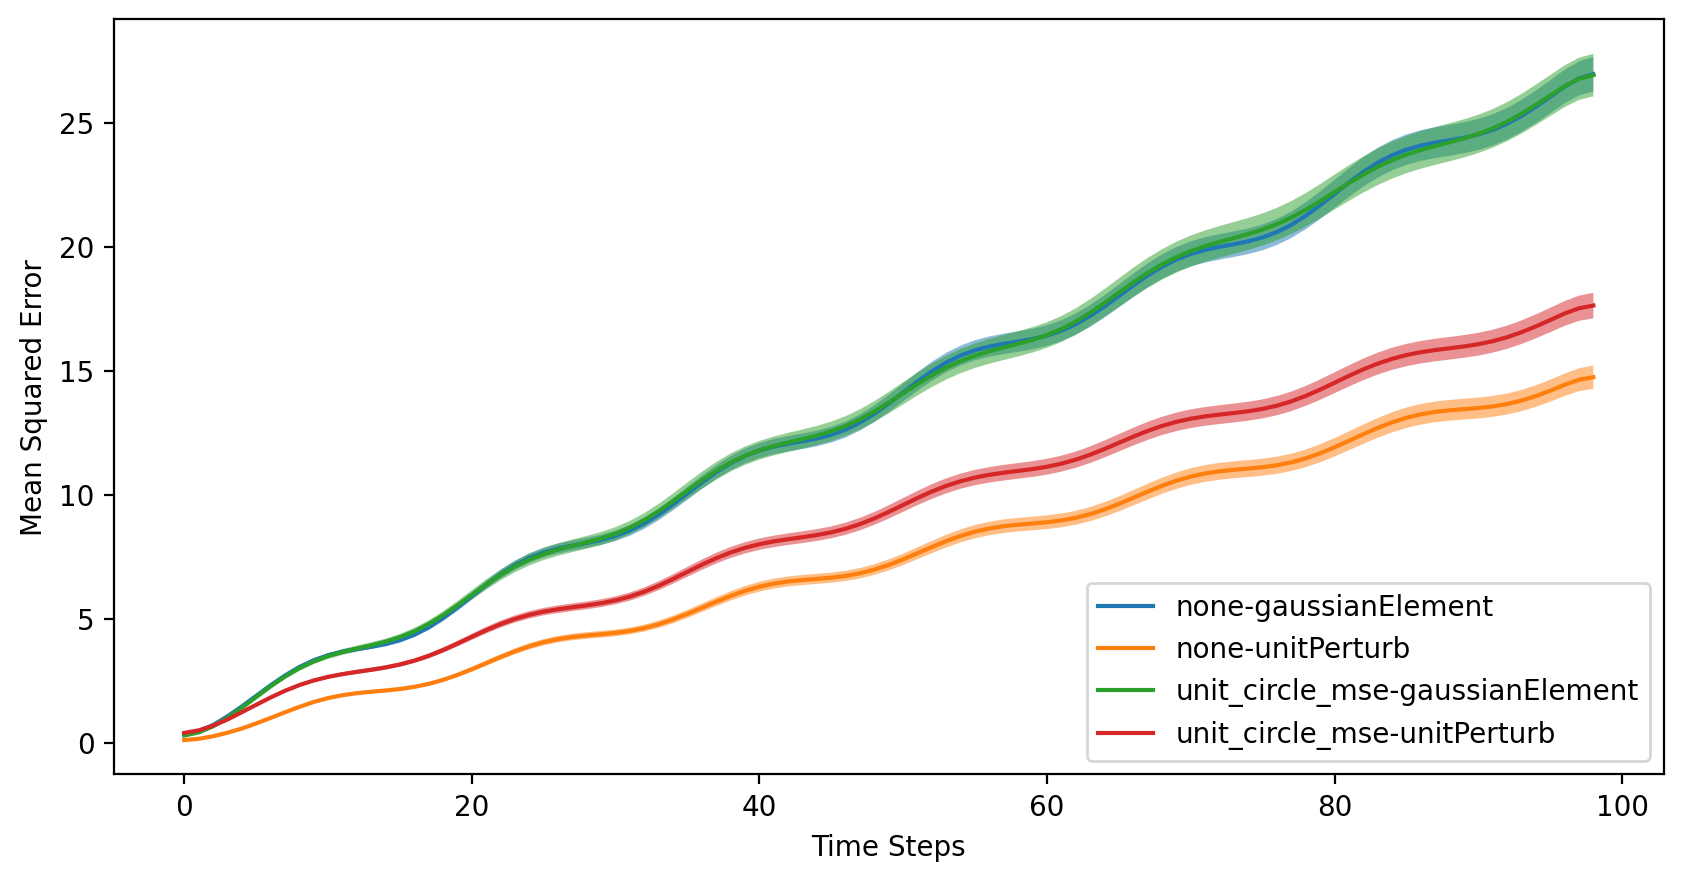

In [64]:
fig = plt.figure(1,figsize=(10,5), dpi=200)

with open("/home/156/jm0124/kae-cyclones/results/run_data/trying_new_100.json", 'r') as f:
     results = json.load(f)

print(results['none']['gaussianElement']['1e0'].keys())
        
mins = {}        

for penaltyName, penalty in results.items():
    epochs = [x for x in range(len(penalty["gaussianElement"]["1e0"]["testAccuracy"]))]
    for init_name, init in penalty.items():
        if init_name == 'uniformEigen' or penaltyName == 'origin_mse':
             continue
        #print(init["1e0"]["testAccuracy"])
        X_, Y_ =  smooth(epochs, np.cumsum(init["1e0"]["testAccuracy"]))
        std_values = np.cumsum(init["1e0"]["testStd"])
        val_x, val_y = (smooth(list(range(0,len(init["1e0"]["fwd_val"]))), init["1e0"]["fwd_val"]))
        #plt.plot(val_x, val_y, label=f"{penaltyName}-{init_name}")
        plt.plot(X_, Y_, label=f"{penaltyName}-{init_name}")
        plt.fill_between(X_, Y_-np.array(std_values)/30, Y_+np.array(std_values)/30, alpha=0.5)
        print(len(penalty["gaussianElement"]["1e0"]["eigen"]))

plt.xlabel('Time Steps')
plt.ylabel('Mean Squared Error')
#plt.yscale('log')
# plt.xscale('log')
# ax.set_xlim(0,100)
# plt.ylim(0,1)
# plt.xlim(0,100)
plt.legend(loc=4)

    
plt.savefig('new.png')
plt.show()

ocean & none & gaussianElement & 0.028 & 3.163
ocean & none & unitPerturb & 0.021 & 1.508
ocean & unit_circle_mse & gaussianElement & 0.029 & 2.804
ocean & unit_circle_mse & unitPerturb & 0.018 & 1.233
fluid & none & gaussianElement & 0.325 & 1.821
fluid & none & unitPerturb & 0.226 & 0.908
fluid & unit_circle_mse & gaussianElement & 0.197 & 0.81
fluid & unit_circle_mse & unitPerturb & 0.216 & 1.167
cyclone & none & gaussianElement & 19.004 & 516.831
cyclone & none & uniformEigen & 18.725 & 348.909
cyclone & unit_circle_mse & gaussianElement & 17.699 & 360.015
cyclone & unit_circle_mse & uniformEigen & 18.166 & 492.522
pendulum & none & gaussianElement & 98.756 & 26.962
pendulum & none & unitPerturb & 80.766 & 14.739
pendulum & unit_circle_mse & gaussianElement & 81.103 & 26.925
pendulum & unit_circle_mse & unitPerturb & 83.781 & 17.628


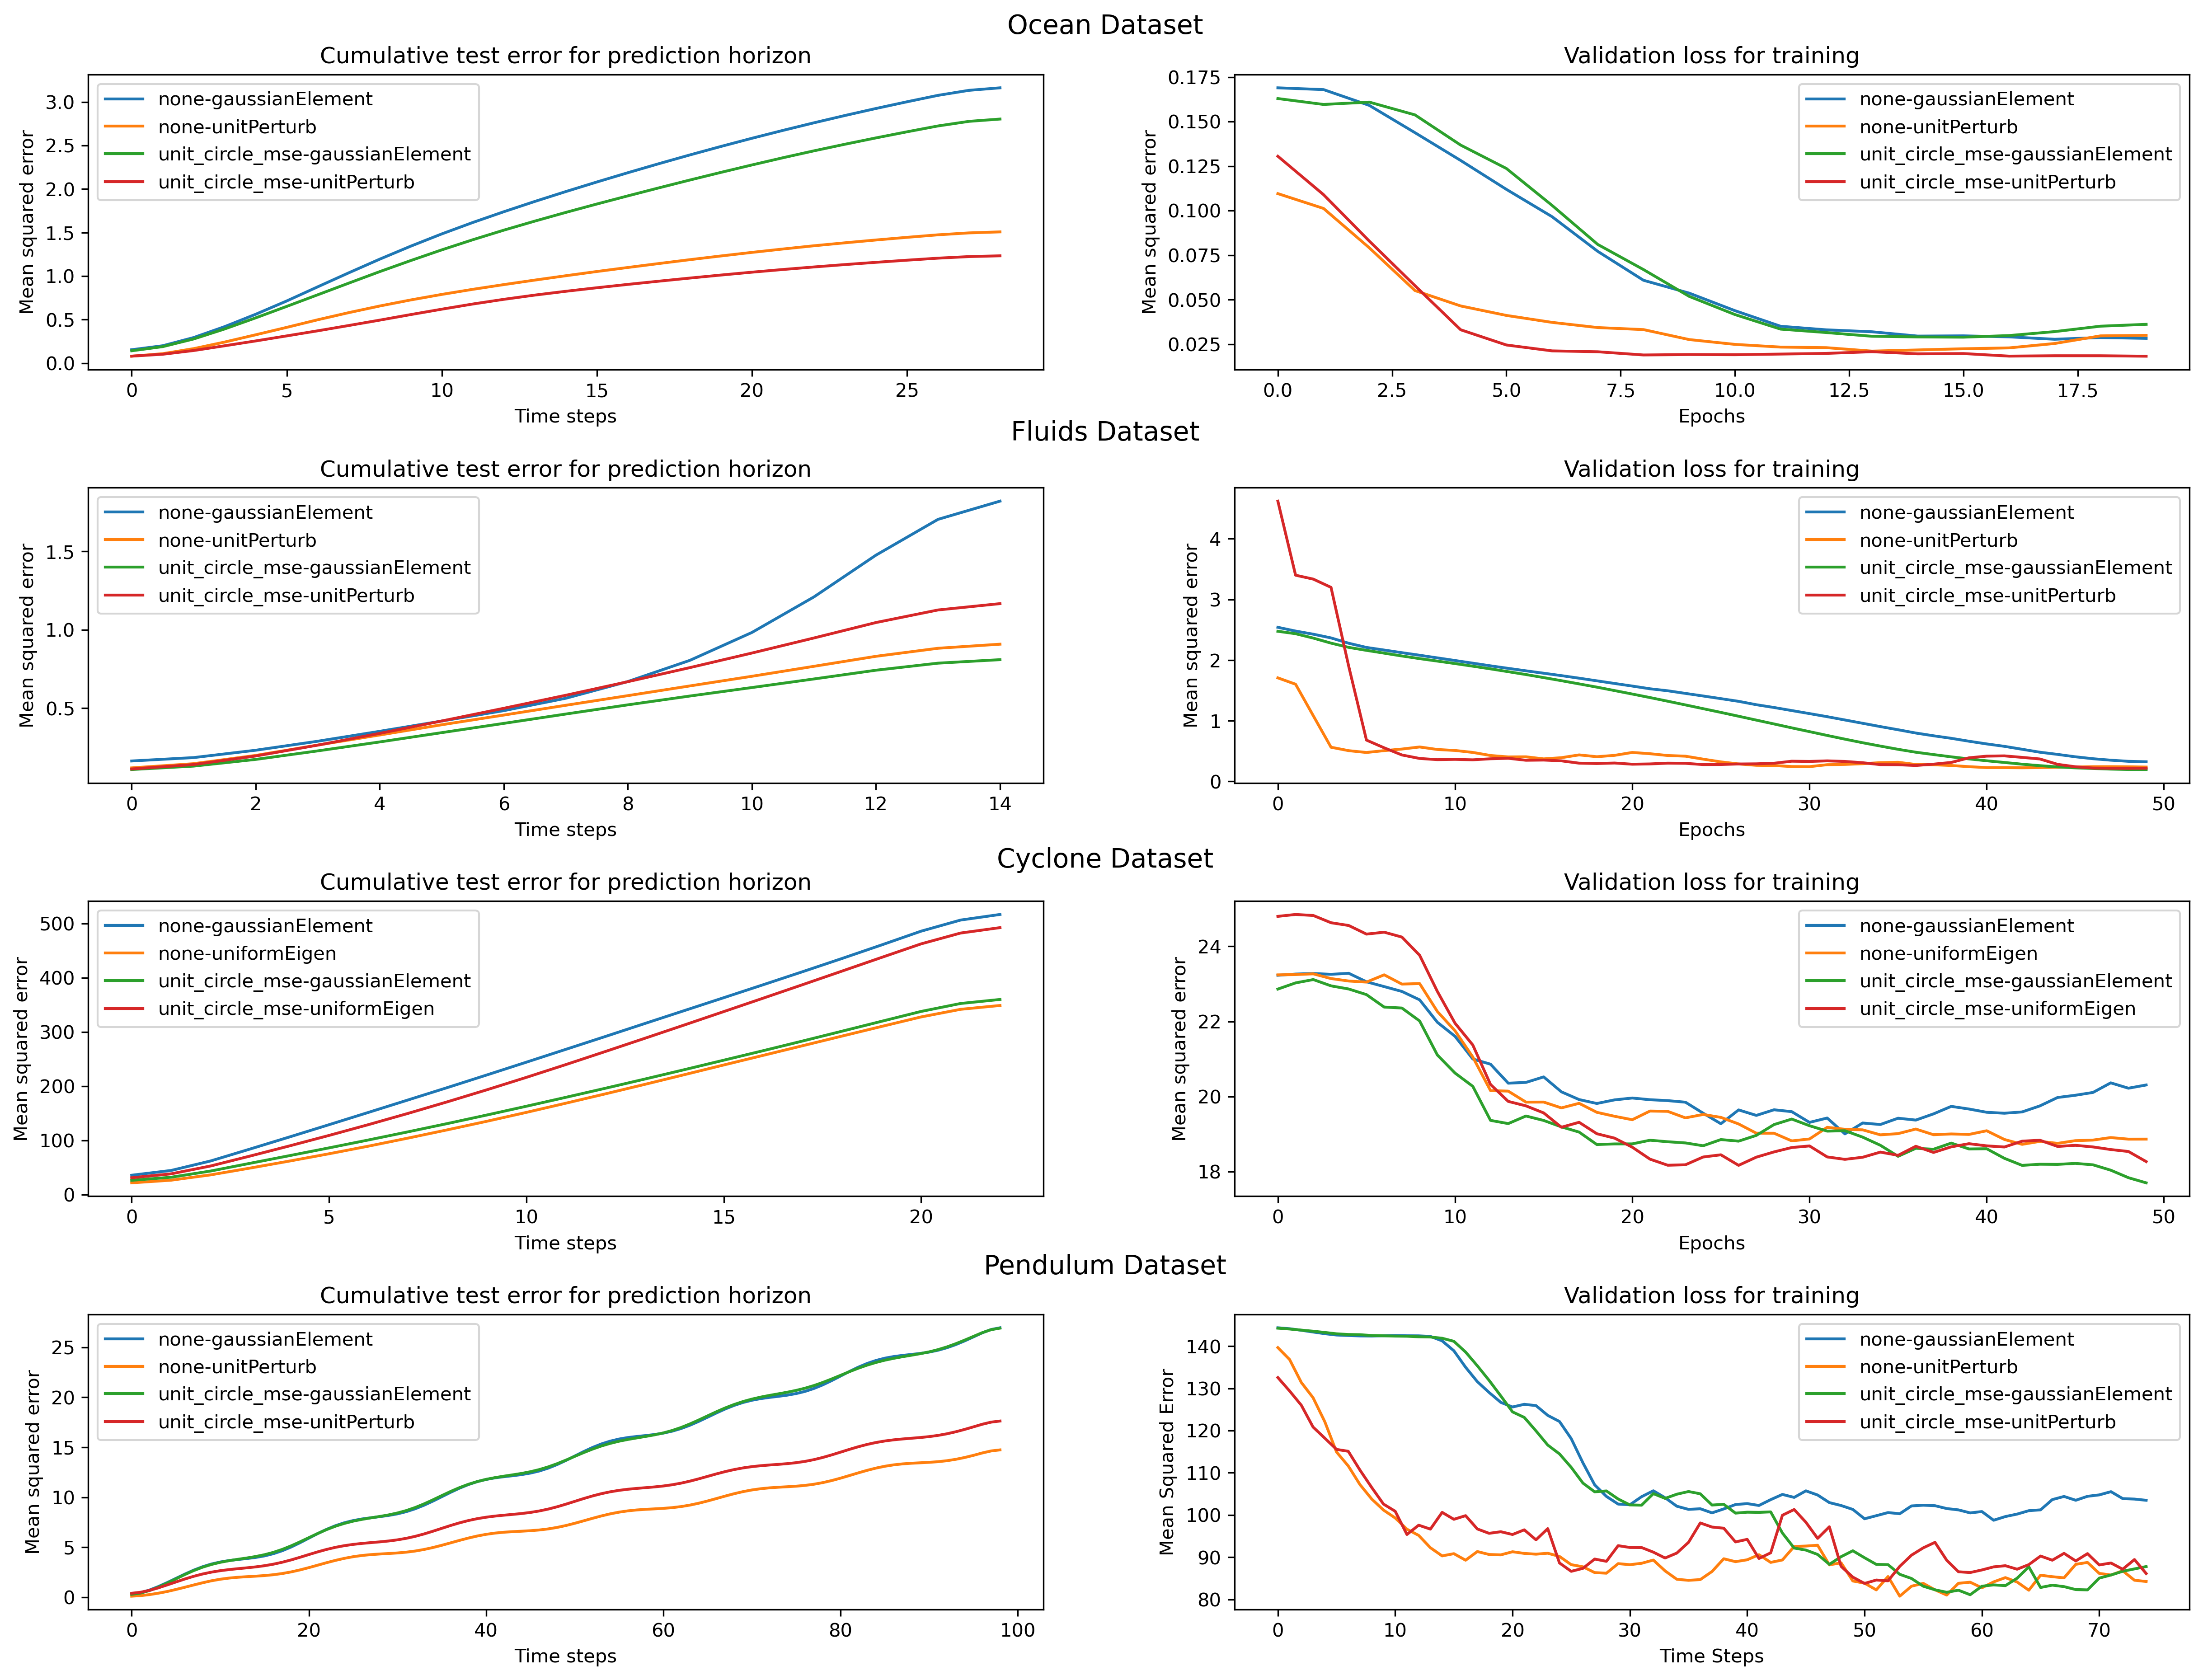

In [97]:
fig, axs = plt.subplots(4,2,figsize=(20,15), dpi=300)

results = []

with open("/home/156/jm0124/kae-cyclones/results/run_data/trying_new_ocean.json", 'r') as f:
     results.append(('ocean',json.load(f)))

with open("/home/156/jm0124/kae-cyclones/results/run_data/trying_new_fluid_7.json", 'r') as f:
     results.append(('fluid',json.load(f)))
        
with open("/home/156/jm0124/kae-cyclones/results/run_data/trying_new_cyclone_3.json", 'r') as f:
     results.append(('cyclone',json.load(f)))

with open("/home/156/jm0124/kae-cyclones/results/run_data/trying_new_100.json", 'r') as f:
     results.append(('pendulum',json.load(f)))

#print(results['none']['gaussianElement']['1e0'].keys())
        
mins = {}        

for i, (name, result) in enumerate(results):
    plt.subplots_adjust(hspace = 0.4 )
    for penaltyName, penalty in result.items():
        epochs = [x for x in range(len(penalty["gaussianElement"]["1e0"]["testAccuracy"]))]
        for init_name, init in penalty.items():
            exclude = ""
            smoothing = 5
            div = 5
            if i ==1:
                div = 1
            if i == 2: 
                exclude = 'unitPerturb'
                smoothing = 20
                div = 15
            elif i == 3: 
                exclude = 'uniformEigen'
                div = 15
            if init_name == exclude or penaltyName == 'origin_mse':
                continue
            X_, Y_ =  smooth(epochs, np.cumsum(init["1e0"]["testAccuracy"]))
            std_values = np.cumsum(init["1e0"]["testStd"])
            val_x, val_y = (smooth(list(range(0,len(init["1e0"]["fwd_val"]))), init["1e0"]["fwd_val"], smoothing))
            axs[i][1].plot(val_x, val_y, label=f"{penaltyName}-{init_name}")
            axs[i][0].plot(X_, Y_, label=f"{penaltyName}-{init_name}")
            print(f"{name} & {penaltyName} & {init_name} & {round(np.min(val_y), 3)} & {round(Y_[-1],3)}")
            #axs[i][0].fill_between(X_, Y_-np.array(std_values)/div, Y_+np.array(std_values)/div, alpha=0.5)
            axs[i][0].set_title('Cumulative test error for prediction horizon')
            axs[i][1].set_title('Validation loss for training')
            axs[i][0].set_ylabel('Mean squared error')
            axs[i][1].set_ylabel('Mean squared error')
            axs[i][0].set_xlabel('Time steps')
            axs[i][1].set_xlabel('Epochs')
            axs[i][0].legend()
            axs[i][1].legend()
            #print(len(penalty["gaussianElement"]["1e0"]["eigen"]))

plt.xlabel('Time Steps')
plt.ylabel('Mean Squared Error')
plt.figtext(0.5, 0.91, 'Ocean Dataset', ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.71, "Fluids Dataset", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.5, "Cyclone Dataset", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.3, "Pendulum Dataset", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )
#plt.yscale('log')
# plt.xscale('log')
# ax.set_xlim(0,100)
# plt.ylim(0,1)
# plt.xlim(0,100)
#plt.legend(loc=4)

    
plt.savefig('new.png')
plt.show()

In [20]:
import numpy as np
i = -1
j = -1
list1 = [[],[],[]]
list2 = [[],[],[]]
for index, row in df11.iterrows():
    if index % 150 == 0:
        j += 1
        i = -1
    
    if index % 50 == 0:
        i += 1
    
    if j == 2:
        list1[i].append(row[3:].values)
    
    if j == 3:
        list2[i].append(row[3:].values)
    
def get_avg_array(lst):        
    avg_array = np.zeros((16,49))

    for i in range(0,len(lst[0])-1):
        for k in range(0,16):

            avg_array[k][i] = abs(complex(lst[0][i][k]))
    
    return avg_array
        # avg.append(((np.array(l[0][i])) + np.array(l[1][i]) + np.array(l[2][i]))/3)

NameError: name 'df11' is not defined

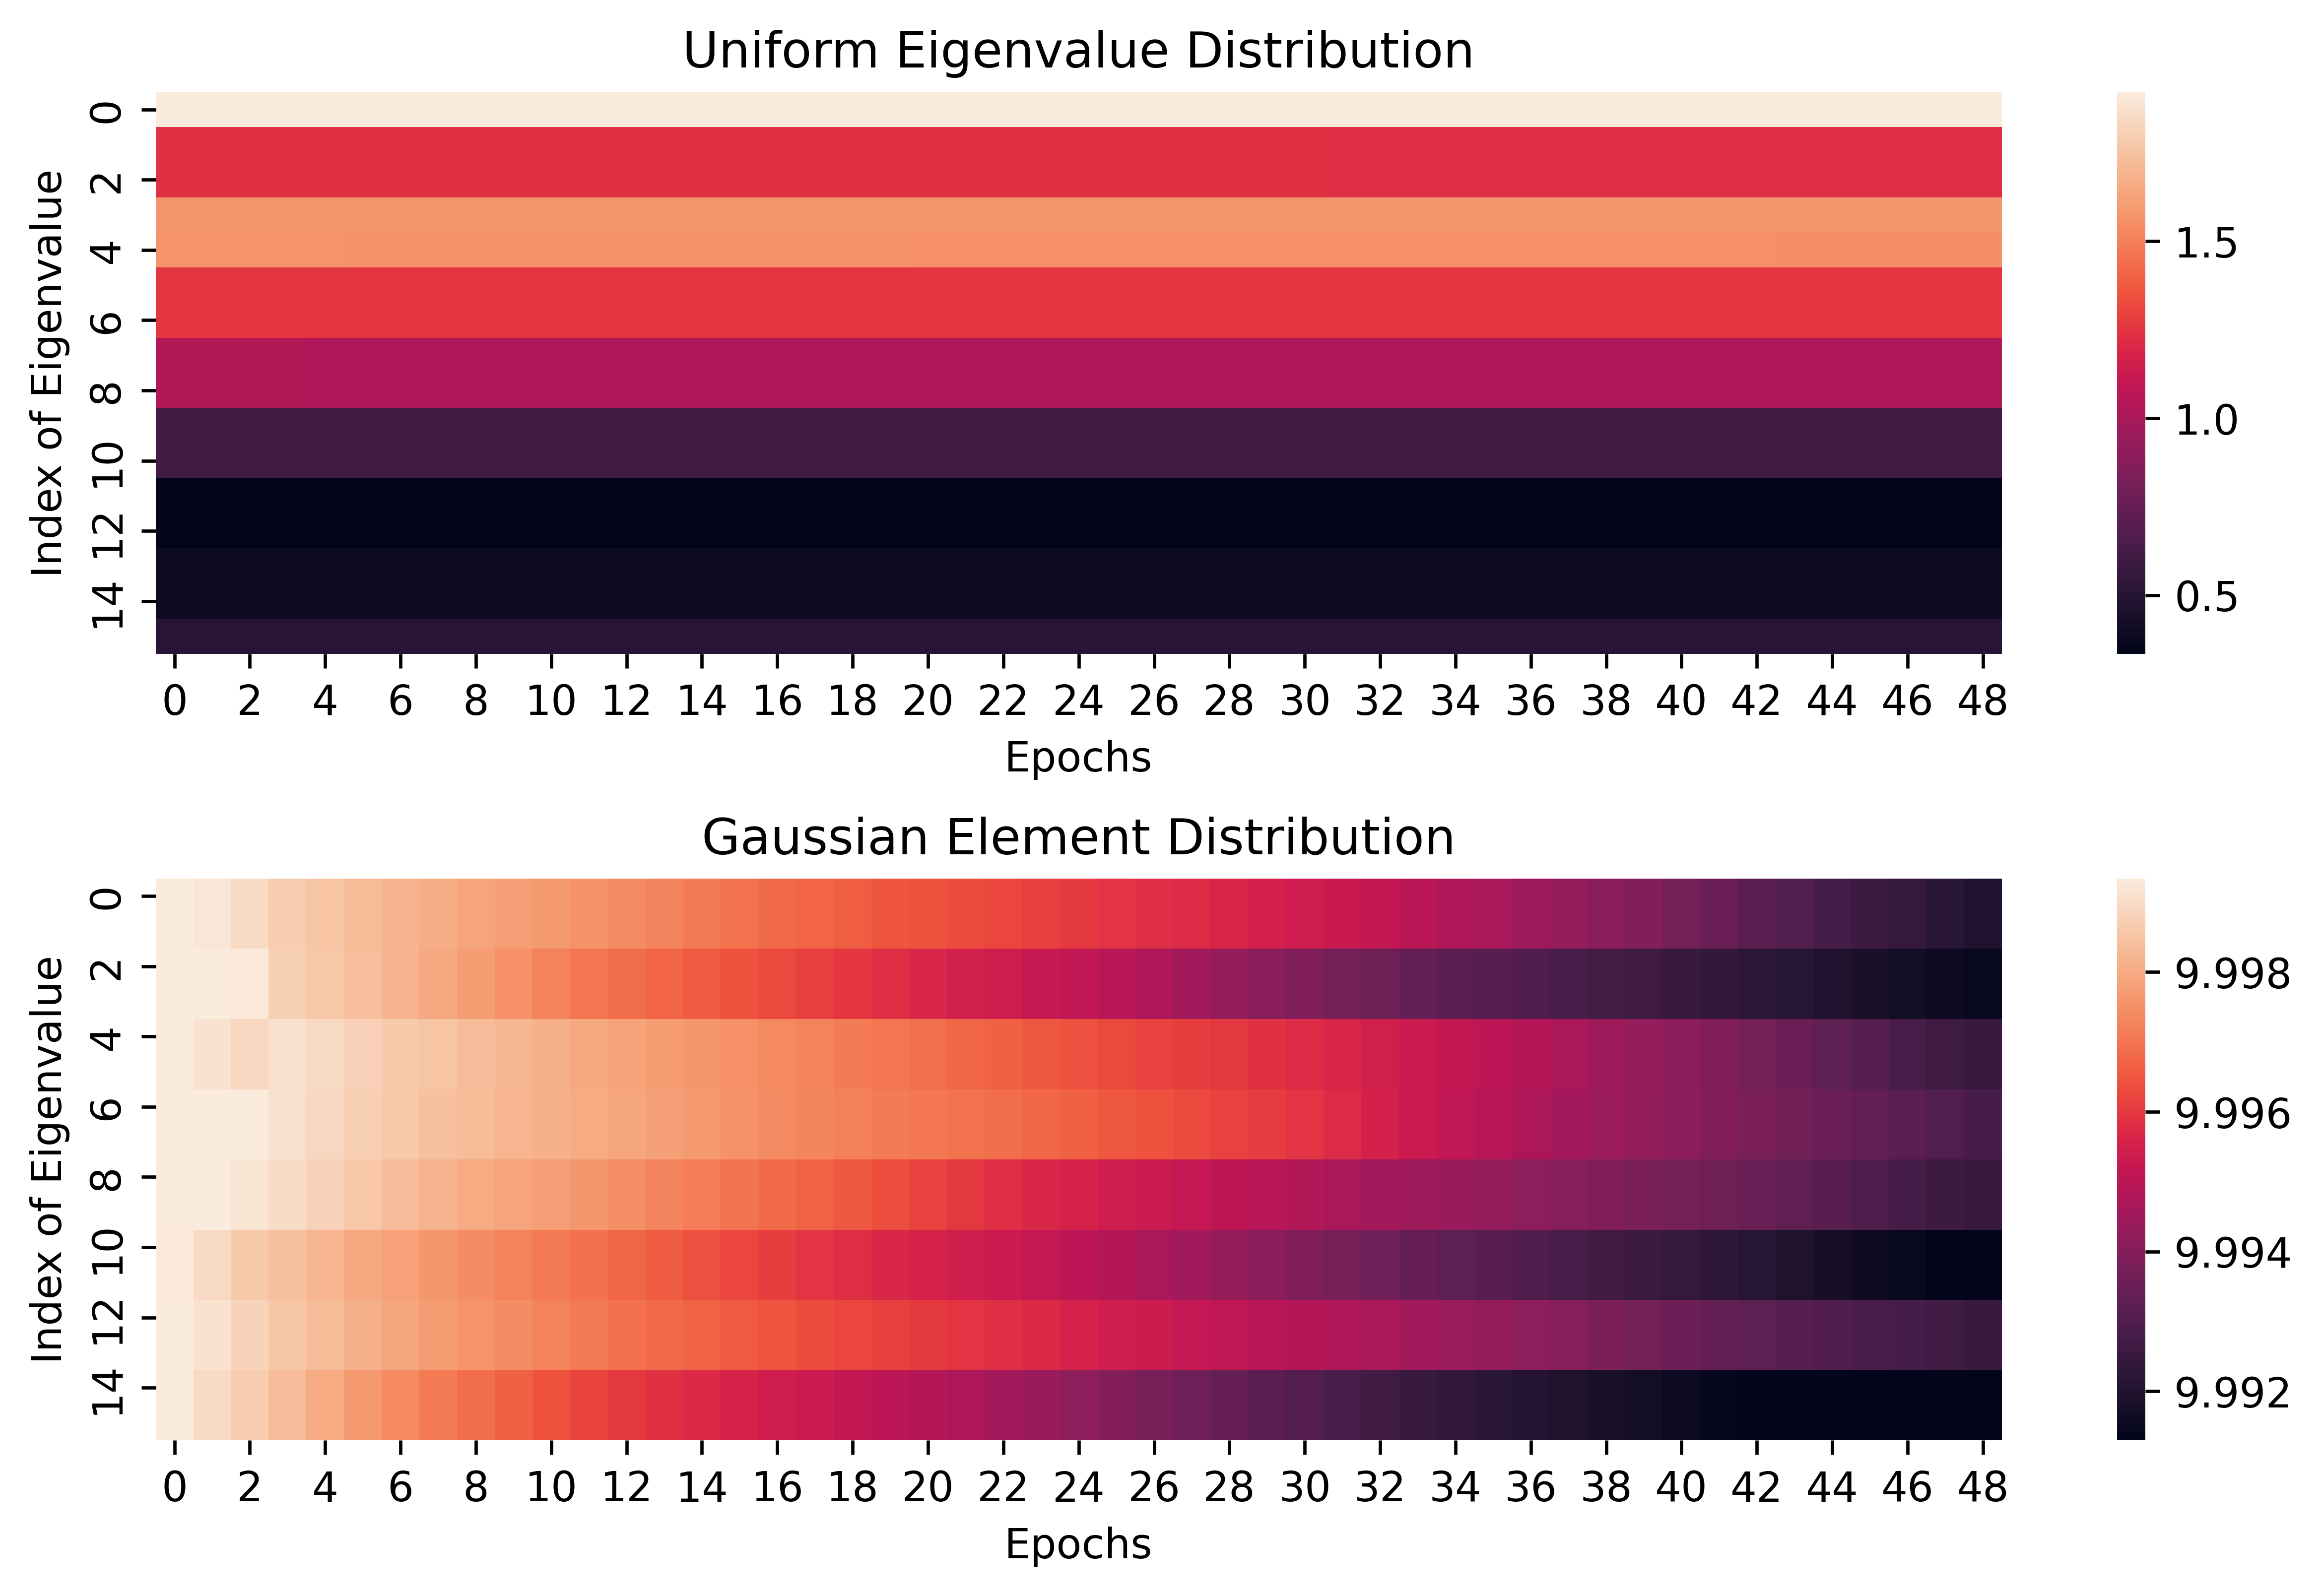

In [305]:
import seaborn
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=0, vmax=1)

fig, axs = plt.subplots(2,1, figsize=(10,6), dpi=600)
seaborn.heatmap(get_avg_array(list1), ax=axs[0], robust=True)
seaborn.heatmap(get_avg_array(list2), ax=axs[1], robust=True)
axs[0].set_title('Uniform Eigenvalue Distribution')
axs[1].set_title('Gaussian Element Distribution')

for ax in axs:
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Index of Eigenvalue')

plt.subplots_adjust(hspace = 0.4 )
plt.savefig('Eigenvalue Plot.png')

<AxesSubplot:>

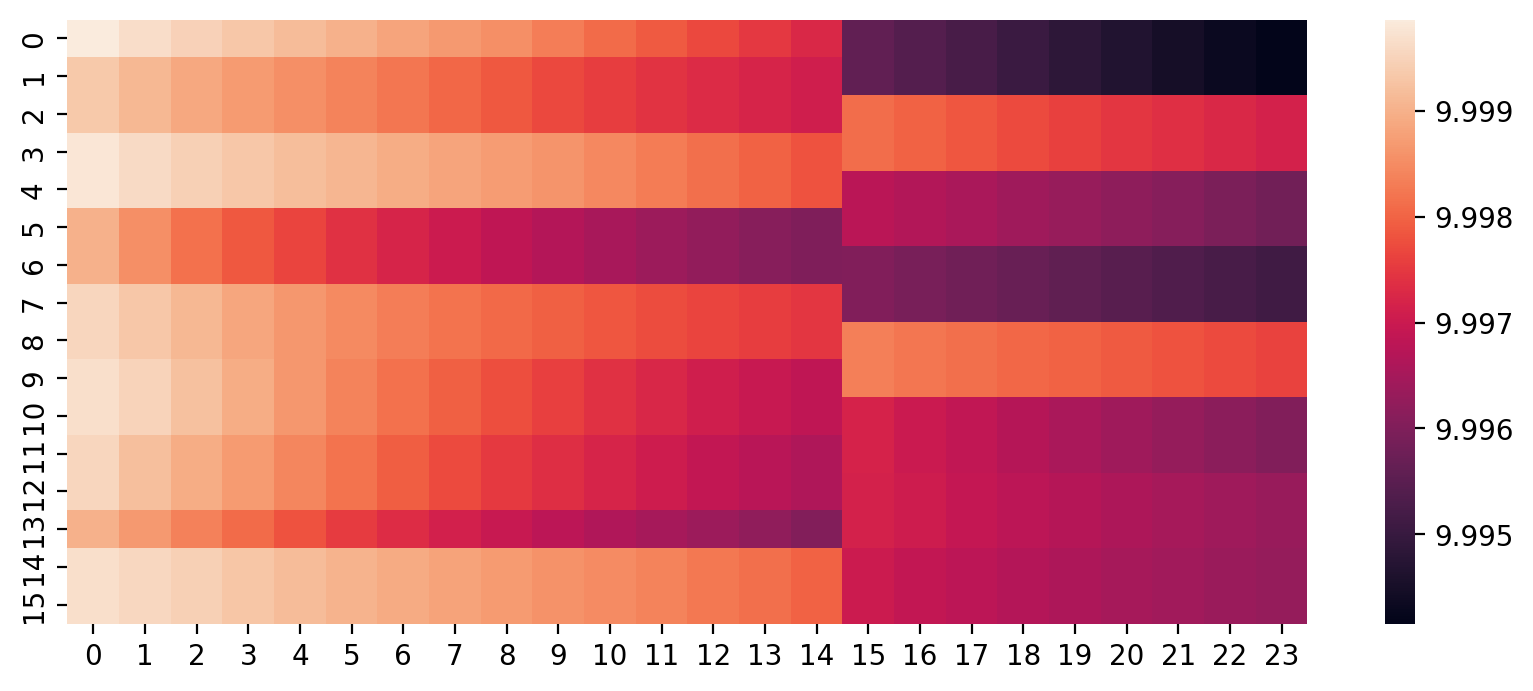

In [139]:
fig = plt.figure(figsize=(10,4), dpi=200)
seaborn.heatmap(get_avg_array(list2))